<a href="https://colab.research.google.com/github/pkong0414/Deep-Learning-Projects/blob/master/clockAI_with_dropout_v0.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing library

import keras
from keras.models import *
from keras.layers import *
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#use this when you use google colab only!
from google.colab import files, drive

import glob
import pandas as pd
import io
import numpy as np
import cv2
from PIL import Image
import pathlib


import tensorflow as tf



Using TensorFlow backend.


Created by: Patrick Kong, Cody Hawkings
                
    clockAI project:
    
    This clock ai would aim to use computervision in order to read a clock's time.
    It would be able to read digital and more importantly analog clocks.
    
    We will be using google colab for this project.

###Mounting Google Drive

In [3]:
#to import multiple files into google colab we first need to mount google drive
#so that we can make directory calls to our photos and CSV files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####A quick check of the files in the directory to see if the drive mounted correctly

In [0]:
!ls "/content/drive/My Drive/"

'Analog Clock'		    RSVP.gform		   test_validation.xlsx
 battery_report.html.gdoc  'Signup Sheet.gsheet'   train_analog
'Colab Notebooks'	    test_analog.csv	   train_analog.zip
 filename_Labels.csv	    test_analog_set	   train_digital.zip
'Getting started.pdf'	    test_val_analog.csv
 my_clock_ai_v0.1.HDF5	    test_val_digital.csv


####Directory Calls to Google Drive

In [5]:
#file directory for analog
base_A_dir = "/content/drive/My Drive/train_analog"

#file directory for digital
#base_D_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/Digital Clock/train"

#file directory for target (labels)
base_LA_dir = "/content/drive/My Drive/test_val_analog.csv"
#base_LD_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_val_digital.csv"


#open files from drive mount in google colab for correct picture names and lables
file_csv = open(base_LA_dir, 'r')
file2_csv = open(base_LA_dir, 'r')


#first we must go through the file and then split the information
#we then remove any unwanted fluff so that we are only left with 
#the filename and the picture label
#the filename will later be used to be joined with the correct directory
#so that we can open up pictures in order
train_A_labels = []
train_A_labels2 = []
train_A_filenames = []
text_A = []
text_A2 = []

for files in file_csv:
  text_A = files.split( "," )
  text_A2 = files.split( "," )
  train_A_labels.append( text_A[1].strip( '\n' ) )
  train_A_labels2.append( text_A2[1].strip( '\n' ) )
  train_A_filenames.append( text_A[0].strip( '\ufeff' ) )
#print( train_A_labels )
#print( train_A_filenames )


#We are not going to load the dataset for digital clock images

# train_D_labels = []
# train_D_filenames = []
# text_D = []
# for files in file2_csv:
#   text_D = files.split( "," )
#   train_D_labels.append( text_D[1].strip( '\n' ) )
#   train_D_filenames.append( text_D[0].strip( '\ufeff' ) )
# print( train_D_labels )
# print( train_D_filenames )


                                                                                     
temp2 = []
image_analog = []

for items in train_A_filenames:
  temp2 = os.path.join( base_A_dir, items )
  image_analog.append( temp2 )

print( image_analog )

# We are not using any samples from the digital clock set

# temp3 = []
# image_digital = []
# for item in train_D_filenames:
#   temp3 = os.path.join( base_D_dir, item )
#   image_digital.append( temp3 )

# print( image_digital )


def Annotate_Time( train_A_labels ):                                                                                     

  time = []
  timeL = []
  theta = np.zeros( ( 720, 2 ), dtype = 'float64' )
  radius = np.zeros( ( 720, 2 ), dtype = 'float64' )
  annotate_Hour = np.zeros( ( 720, 2 ), dtype = 'float64' )
  annotate_Min = np.zeros( ( 720, 2 ), dtype = 'float64' )
  label_hour = []

  hour = 0.0
  minute = 0.0


  #this will read from the csv labels and calculate the appropriate theta
  #for the minute hand

  #this will read the label and calculate the theta for the
  #hour hand now

  thetaH = []
  thetaM = []
  for i in range( len( train_A_labels ) ):

    time =  train_A_labels[ i ].split( ':' )
    hour = int( time[ 0 ] )
    minute = int( time[ 1 ] )
    if ( time[ 0 ] == '12' ):
      hour = 0
    annotate_Hour[ i ][ 1 ] = float( 0.5 * minute ) + float( 30 * hour )
    annotate_Hour[ i ][ 0 ] = 2
    annotate_Min[ i ][ 1 ] = float( 6 * minute )
    annotate_Min[ i ][ 0 ] = 4

    timeL.append( str( time[ 0 ] + time[ 1 ] ) )

    X = np.full( [ 100, 100, 1 ], annotate_Hour[i][1])
    X = np.expand_dims( X, axis = 0 )
    thetaH.append( X )
    Y = int( time[ 0 ] ) - 1
    label_hour.append( Y )
    Z = np.full( [ 100, 100, 1 ], annotate_Min[i][1])
    Z = np.expand_dims(Z, axis = 0)
    thetaM.append( Z )
  thetaH = np.concatenate( thetaH, axis = 0 )
  thetaM = np.concatenate( thetaM, axis = 0 )
  print(thetaH.shape)
  print(thetaM.shape)

  #this will stack theta in a 720 x 1 x 2 format
  #printing output of both theta and radius
  print( timeL )

  print( "Hour annotations: \n" )
  print( annotate_Hour[ 0 ] )
  print( "Minute annotations: \n" )
  print( annotate_Min[ 0 ] )
  
  return thetaH, thetaM, label_hour

feature_hour, feature_min, label_hour = Annotate_Time( train_A_labels )

print( "feature hour shape: ")
print( feature_hour.shape )

print( label_hour[ 0:5 ] )


['/content/drive/My Drive/train_analog/pic_1', '/content/drive/My Drive/train_analog/pic_2', '/content/drive/My Drive/train_analog/pic_3', '/content/drive/My Drive/train_analog/pic_4', '/content/drive/My Drive/train_analog/pic_5', '/content/drive/My Drive/train_analog/pic_6', '/content/drive/My Drive/train_analog/pic_7', '/content/drive/My Drive/train_analog/pic_8', '/content/drive/My Drive/train_analog/pic_9', '/content/drive/My Drive/train_analog/pic_10', '/content/drive/My Drive/train_analog/pic_11', '/content/drive/My Drive/train_analog/pic_12', '/content/drive/My Drive/train_analog/pic_13', '/content/drive/My Drive/train_analog/pic_14', '/content/drive/My Drive/train_analog/pic_15', '/content/drive/My Drive/train_analog/pic_16', '/content/drive/My Drive/train_analog/pic_17', '/content/drive/My Drive/train_analog/pic_18', '/content/drive/My Drive/train_analog/pic_19', '/content/drive/My Drive/train_analog/pic_20', '/content/drive/My Drive/train_analog/pic_21', '/content/drive/My Dr

Loading all image and labels to use for dataset.

This dataset consist of 720 images of clocks. 

We loaded it in grayscale, with the image format of 100 width x 100 height x 1 channel.

Annotate time will generate the features to help the model predict time and as well as a label for our
to_categorical function.

In [0]:
target_dataset = []

target_dataset = keras.utils.to_categorical( label_hour, 12 )
print( target_dataset )
print( target_dataset.shape )


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(720, 12)


This will take our output dataset and transform the label of numbers into a 1 x 12 matrix of 0's and 1's.

In [0]:
print( target_dataset[60] )

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


This is the output that is translated by the to_categorical function.. 

In [0]:
#puts everything into a (720, 100, 100, 1) 4d tensor
imgs = []
for images in image_analog:
  img = image.load_img( images + ".JPG", target_size =( 100, 100 ), color_mode = "grayscale" )
  image_tensor = image.img_to_array( img )
  image_tensor = np.expand_dims( image_tensor, axis = 0 )
  image_tensor /= 255.0
  imgs.append( image_tensor )
  
imgs = np.concatenate( imgs, axis = 0 )
print( imgs.shape )


(720, 100, 100, 1)


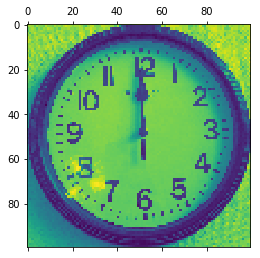

In [0]:
plt.matshow(imgs[0,:, : , 0])
# plt.show()

Plotting an image to visualize the input we are working with.

In [0]:
#transforms shape to a (720, 100, 100, 3) 4d tensor
dataset = []
dataset = np.concatenate( [ imgs, feature_hour, feature_min ], axis = -1 )
print(dataset.shape)


(720, 100, 100, 3)


This will take the images along with the feature engineering and form our input going into the model.

Each feature will be in format of: 720 x 100 x 100 x 1.

720 samples of features, each in a 100 by 100 matrix of annotated values.

So by stacking everything channel-wise we get with an input shape of:
720 samples x 100 width x 100 height x 3 channels

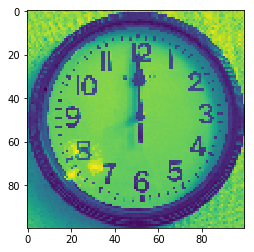

[[0.88235295 0.88235295 0.83529413 ... 0.85882354 0.90196079 0.88627452]
 [0.84313726 0.86274511 0.84705883 ... 0.89019608 0.89019608 0.9254902 ]
 [0.76078433 0.82745099 0.87843138 ... 0.86666667 0.89019608 0.87843138]
 ...
 [0.69411767 0.71764708 0.6901961  ... 0.80000001 0.82745099 0.8509804 ]
 [0.71372551 0.63921571 0.66274512 ... 0.79607844 0.74117649 0.79215688]
 [0.71764708 0.6901961  0.67450982 ... 0.80784315 0.77254903 0.7764706 ]]


In [0]:
#image and 0 - 1 values
plt.imshow(dataset[0,:,:,0])
plt.show()
print(dataset[0,:,:,0])

double checking length of the image after the resizing operation.

visualizing input in an array format.

printing length of image d after the resizing operation

In [0]:
dataset, target_dataset = shuffle( dataset, target_dataset )

We use the shuffle function to shuffle the dataset and labels.

In [0]:
def k_folding( dataset, target_dataset ):

  k = 5
  num_val_samples = 720 // k 
  num_scores = []

  for i in range( k ):
    print( 'processing fold #', i )
    val_data = dataset[ ( i * num_val_samples ) :  (i + 1) * num_val_samples ]
    val_targets = target_dataset[ i * num_val_samples: (i + 1) * num_val_samples ]

    partial_train_data = np.concatenate(
      [ dataset[ :i * num_val_samples ],
       dataset[ ( i + 1 ) * num_val_samples: ] ],
      axis = 0 )

    partial_train_targets = np.concatenate(
      [ target_dataset[ :i * num_val_samples ],
       target_dataset[ ( i + 1 ) * num_val_samples: ] ],
      axis = 0 )
  
  return partial_train_data, partial_train_targets, val_data, val_targets
  
x_input, y_output, x_val, y_val = k_folding( dataset, target_dataset )
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


This is the k folding snippet we'll use to get our split our training and validation data.

We do in folds of 5

This takes our total dataset and gives us a split of input and output  in 80/20 configuration.

In [0]:
print( "x_input shape: ", x_input.shape )
print( "y_output shape: ", y_output.shape )
print( "x_val shape: ", x_val.shape )
print( "y_val shape: ", y_val.shape )

x_input shape:  (540, 100, 100, 3)
y_output shape:  (540, 12)
x_val shape:  (180, 100, 100, 3)
y_val shape:  (180, 12)


using k fold to boost sample as well as slice validation datasets

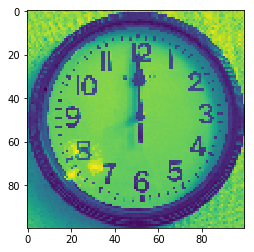

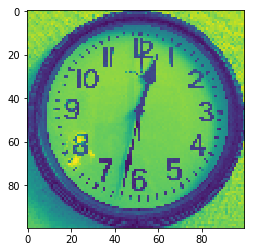

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[0.88235295 0.88235295 0.83529413 0.86666667 0.78431374]
 [0.84313726 0.86274511 0.84705883 0.76078433 0.86274511]
 [0.76078433 0.82745099 0.87843138 0.83137256 0.73725492]
 [0.74117649 0.8392157  0.86274511 0.83529413 0.78823531]
 [0.84313726 0.72941178 0.8392157  0.90196079 0.83137256]]
[[0.8509804  0.84705883 0.76862746 0.88235295 0.87058824]
 [0.8509804  0.84705883 0.8392157  0.83137256 0.89019608]
 [0.81176472 0.87058824 0.89019608 0.8509804  0.78039217]
 [0.83529413 0.80392158 0.87843138 0.8509804  0.82352942]
 [0.79607844 0.89019608 0.81960785 0.83529413 0.84705883]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
len(image_analog)
plt.imshow(x_input[0, :, :, 0])
plt.show()
plt.imshow(x_val[0, :, :, 0])
plt.show()
print(y_val[0])
print(x_input[0, :5, :5, 0])
print(x_val[0, :5, :5, 0])
print(y_val[0])
print(y_val[100])

Sanity test for the files.

In [0]:

def residual_unit( inputs, filters, kernel, drop_out = 0.0, pooling = False ):
  res = inputs
  
  if pooling == True:
    res = Conv2D( filters, kernel_size = 1, strides = ( 2, 2) )( res )
    inputs = MaxPooling2D( pool_size = ( 2, 2 ) )(inputs)
    
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  inputs = Dropout( drop_out )( inputs )
  
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  
  inputs = keras.layers.add( [ inputs, res ] )
  
  return inputs


This is the residual unit function.

It has 2 default value: drop out and pooling. This gives us the option to add drop out and pooling elements
in the model.

ResNet:

First a res variable will be used to carry the initial input. This will hold our input values for later use

The residual unit contains 2 CNN layer, the first CNN layer will contain the drop out element.
After the second layer, both the result of the input and the initial input will be added to form a final input.

In [0]:

input_shape = Input( shape = x_input[ 0, :, :, :].shape )

inputs = input_shape

inputs = Conv2D( 16, 3, padding = 'same' )( inputs )
inputs = residual_unit( inputs, 16, 3 )
#inputs = residual_unit( inputs, 32, 3 )

inputs = residual_unit( inputs, 32, 3, 0.3, True )
inputs = residual_unit( inputs, 32, 3 )

inputs = residual_unit( inputs, 64, 3, 0.3, True )
inputs = residual_unit( inputs, 64, 3 )

#inputs = residual_unit( inputs, 32, 3, 0.0, True )
#inputs = residual_unit( inputs, 32, 3 )

inputs = BatchNormalization()( inputs )
inputs = Conv2D( 128, 3 )( inputs )
inputs = Activation( "relu" )( inputs )

inputs = Flatten()( inputs )
inputs = Dense( 128 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 64 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 32 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 12 )( inputs )
prediction = Activation( "softmax" )( inputs )
model = Model( input_shape, prediction )


a = keras.callbacks.ModelCheckpoint( filepath='/content/drive/My Drive/my_clock_ai_v0.1.h5', monitor='val_acc', save_best_only=True )
b = keras.callbacks.EarlyStopping( monitor = 'val_acc', patience = 100 )

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit( x_input , y_output, epochs = 1000, batch_size = 200, 
              callbacks = [ a, b ], validation_data = ( x_val, y_val ) )

Train on 540 samples, validate on 180 samples
Epoch 1/2000
540/540 [==============================] - 5s 10ms/step - loss: 2.5252 - acc: 0.1333 - val_loss: 2.4859 - val_acc: 0.1333
Epoch 2/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.4517 - acc: 0.1833 - val_loss: 2.4464 - val_acc: 0.1333
Epoch 3/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.4147 - acc: 0.1852 - val_loss: 2.4058 - val_acc: 0.1500
Epoch 4/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.3857 - acc: 0.1907 - val_loss: 2.3734 - val_acc: 0.1778
Epoch 5/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.3554 - acc: 0.2241 - val_loss: 2.3540 - val_acc: 0.1778
Epoch 6/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.3292 - acc: 0.2500 - val_loss: 2.3208 - val_acc: 0.2389
Epoch 7/2000
540/540 [==============================] - 1s 2ms/step - loss: 2.3019 - acc: 0.2630 - val_loss: 2.2907 - val_acc: 0.2389
Epoch 8/2000
54

first run with no dropout and got a flat validation acc curve. Moved dropout to 30%.
second run, double filter sizes and up batch size to 128 from 100. fell flat no learning
reverted to first filter sizes and dropped to 20% dropout and kept batch size at 128
halved the conv2d layers and lowered batch size to 75. runs faster and train is getting better, val is staying flat.
changed the dropout to 30%. Val_acc is still flat, not gaining.
trying the removal of 3 res_net layers to see if a smaller model works better. Training skyrocketed in acc. Val remains pretty flat still.
removed the 50 filter Dense Layer to see if an even smaller layer will improve training and val acc. Forgot to reset runtimes and train acc hit 100%
reset runtimes and validation is still running flat.

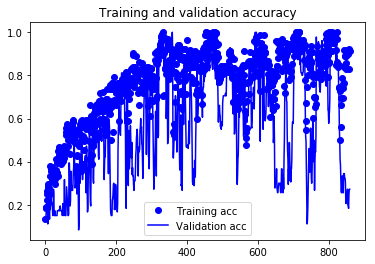

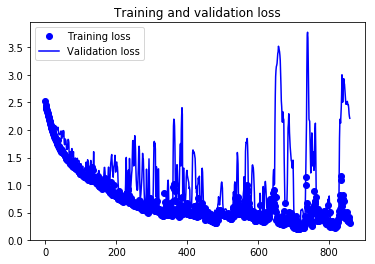

In [0]:

acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

print( "acc: ", acc )
print( "loss: ", loss )
print( "val_acc: ", val_acc )
print( "val_loss: ", val_loss )

epochs = range( len( acc ) )
plt.plot( epochs, acc, 'bo', label='Training acc' )
plt.plot( epochs, val_acc, 'b', label='Validation acc' )
plt.title( 'Training and validation accuracy' )
plt.legend()

plt.figure()

plt.plot( epochs, loss, 'bo', label='Training loss' )
plt.plot( epochs, val_loss, 'b', label='Validation loss' )
plt.title( 'Training and validation loss' )
plt.legend()

plt.show()

In [6]:
test_files_dir = '/content/drive/My Drive/test_analog_set'
test_label_file = '/content/drive/My Drive/test_analog.csv'

test_file_csv = open( test_label_file, 'r' )

text_A = []
test_A_labels = []
test_A_filenames = []

for files in test_file_csv:
  text_A = files.split( "," )
  test_A_labels.append( text_A[1].strip( '\n' ) )
  test_A_filenames.append( text_A[0].strip( '\ufeff' ) )
  
print( test_A_filenames[ : ] )
print( test_A_labels[ : ] )
  
temp2 = []
test_image_analog = []

#appending test analog images  
for items in test_A_filenames:
  temp2 = os.path.join( test_files_dir, items )
  test_image_analog.append( temp2 )

print( test_image_analog )  

test_hour_feature, test_min_feature, test_label_hour = Annotate_Time( test_A_labels )

test_label = keras.utils.to_categorical( test_label_hour, 12 )

#puts everything into a (720, 100, 100, 1) 4d tensor
test_imgs = []
for images in test_image_analog:
  test_img = image.load_img( images, target_size =( 100, 100 ), color_mode = "grayscale" )
  image_tensor = image.img_to_array( test_img )
  image_tensor = np.expand_dims( image_tensor, axis = 0 )
  image_tensor /= 255.0
  test_imgs.append( image_tensor )
  
test_imgs = np.concatenate( test_imgs, axis = 0 )
print( test_imgs.shape )

#transforms shape to a (720, 100, 100, 3) 4d tensor
test_dataset = []
test_dataset = np.concatenate( [ test_imgs, test_hour_feature, test_min_feature ], axis = -1 )
print( test_dataset.shape )


['pic_1.JPG', 'pic_2.JPG', 'pic_3.JPG', 'pic_4.JPG', 'pic_5.JPG', 'pic_6.JPG', 'pic_7.JPG', 'pic_8.JPG', 'pic_9.JPG', 'pic_10.JPG', 'pic_11.JPG', 'pic_12.JPG', 'pic_13.JPG', 'pic_14.JPG', 'pic_15.JPG', 'pic_16.JPG', 'pic_17.JPG', 'pic_18.JPG', 'pic_19.JPG', 'pic_20.JPG', 'pic_21.JPG', 'pic_22.JPG', 'pic_23.JPG', 'pic_24.JPG', 'pic_25.JPG', 'pic_26.JPG', 'pic_27.JPG', 'pic_28.JPG', 'pic_29.JPG', 'pic_30.JPG', 'pic_31.JPG', 'pic_32.JPG', 'pic_33.JPG', 'pic_34.JPG', 'pic_35.JPG', 'pic_36.JPG', 'pic_37.JPG', 'pic_38.JPG', 'pic_39.JPG', 'pic_40.JPG', 'pic_41.JPG', 'pic_42.JPG', 'pic_43.JPG', 'pic_44.JPG', 'pic_45.JPG', 'pic_46.JPG', 'pic_47.JPG', 'pic_48.JPG', 'pic_49.JPG', 'pic_50.JPG', 'pic_51.JPG', 'pic_52.JPG', 'pic_53.JPG', 'pic_54.JPG', 'pic_55.JPG', 'pic_56.JPG', 'pic_57.JPG', 'pic_58.JPG', 'pic_59.JPG', 'pic_60.JPG', 'pic_61.JPG', 'pic_62.JPG', 'pic_63.JPG', 'pic_64.JPG', 'pic_65.JPG', 'pic_66.JPG', 'pic_67.JPG', 'pic_68.JPG', 'pic_69.JPG', 'pic_70.JPG', 'pic_71.JPG', 'pic_72.JPG', 

Loading up the test dataset for demo purposes. 

This is all loaded in grayscale.

The test set consist of a sample of 100 pictures.

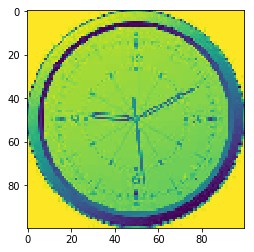

In [7]:

#image and 0 - 1 values
plt.imshow( test_dataset[ 60, :, :, 0 ] )
plt.show()


Showing an image from the test dataset.

This test set contains images different than what we are providing in the input.

In [0]:
test_dataset_shuffle, target_dataset_shuffle = shuffle( test_dataset, test_label )

Shuffling test and target dataset.

In [9]:
model_demo = load_model( '/content/drive/My Drive/my_clock_ai_v0.1.HDF5' )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Loading model of weights on the previous trained dataset.

In [10]:
score = model_demo.evaluate( test_dataset_shuffle, target_dataset_shuffle )
print( "\n%s: %.2f%%" % ( model_demo.metrics_names[1], score[1]*100 ) )

100/100 [==============================] - 2s 23ms/step

acc: 100.00%


Outputting the accuracy of the saved weights on the test dataset.

Gameplan is to use polar coordinates in order to give an additional feature to the learning model during training.

Initially considered using pixels to calculate theta since arctan( y / x ) will give us the angle of the clock hand.
However, since the pixels were blurry compounded by the fact that the conditions to make theta happen is complex, an alternative was considered.

Rather than use X and Y to calculate theta, the idea is then to use degree of 360 and divide by units of 60 ( which represent the minutes ). This gives us 6 degrees of movement per ***"minute"***.

For the ***"Hour"*** hand we know that the hand moves 5 minute units to move to the next hour. 5 * 6 gives us 30 degrees per hour, so if we take 30 degree /60 minutes we get 0.5 degrees/minute.

We plan to use the features engineered for Hours degrees to predict the hours for a clock image.

( 4/29/19 )

*added k folding so we can get our training and validation split accordingly for the small sample size

*added residual unit function which will allow us to make residual units with dropout and pooling capabilities

*added annotation function which will generate the other portion of input the network will be using to learn

